In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# Load the dataset
dress = pd.read_excel('Attribute DataSet.xlsx')

In [4]:
dress.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [5]:
dress.shape

(500, 14)

In [6]:
dress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           498 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          498 non-null    object 
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   waiseline       413 non-null    object 
 9   Material        372 non-null    object 
 10  FabricType      234 non-null    object 
 11  Decoration      264 non-null    object 
 12  Pattern Type    391 non-null    object 
 13  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB


In [7]:
dress.describe().T

,count,mean,std,min,25%,50%,75%,max
Dress_ID,500.0,9.055417e+08,1.736190e+08,444282011.0,767316420.0,908329553.0,1.039534e+09,1.253973e+09
Rating,500.0,3.528600e+00,2.005364e+00,0.0,3.7,4.6,4.800000e+00,5.000000e+00
Recommendation,500.0,4.200000e-01,4.940528e-01,0.0,0.0,0.0,1.000000e+00,1.000000e+00


# Data cleaning

## Dealing with Null values 

In [8]:
dress.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          87
Material          128
FabricType        266
Decoration        236
Pattern Type      109
Recommendation      0
dtype: int64

In [9]:
dress['Price'].ffill(inplace=True)

In [10]:
dress['Season'].ffill(inplace=True)

In [11]:
dress['waiseline'].ffill(inplace=True)

In [12]:
dress['Style'] = dress['Style'].replace({'sexy': 'Sexy'})

In [13]:
dress['Price'] = dress['Price'].replace({'high': 'High', 'Average': 'Medium', 'low': 'Low'})

In [14]:
dress['Size'] = dress['Size'].replace({'s': 'S', 'small': 'S'})

In [15]:
dress['Season'] = dress['Season'].replace({'summer': 'Summer', 'Automn': 'Autumn', 'spring': 'Spring', 'winter': 'Winter'})

Only those data which are required will be taken for the research

# EDA

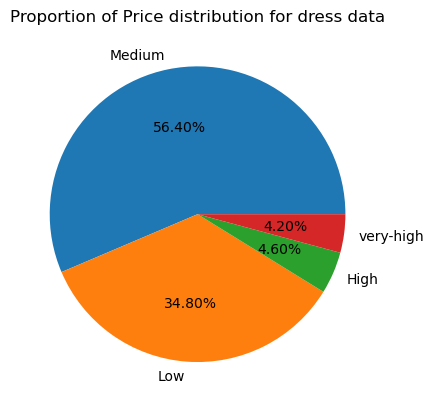

In [16]:
plt.pie(dress['Price'].value_counts(), labels=dress['Price'].value_counts().index, autopct='%1.2f%%')
plt.title("Proportion of Price distribution for dress data")
plt.show()

<Axes: xlabel='Rating', ylabel='Count'>

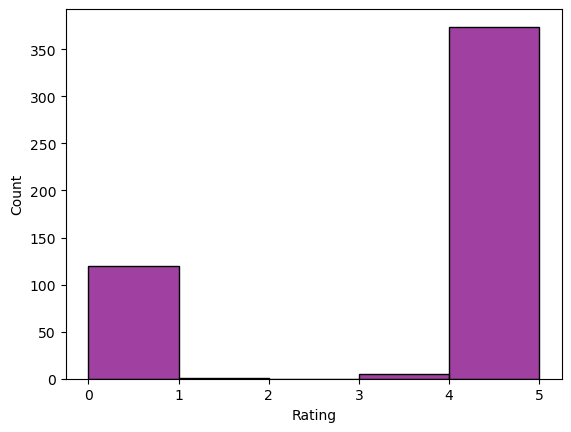

In [17]:
sns.histplot(dress['Rating'], color='purple',bins=5)

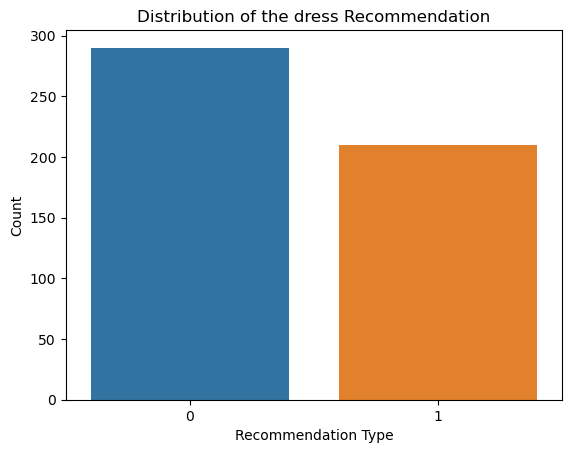

In [18]:
sns.countplot(x='Recommendation', data=dress)
plt.title("Distribution of the dress Recommendation")
plt.xlabel("Recommendation Type")
plt.ylabel("Count")
plt.show()

In [ ]:
# Univariate Analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='Style', data=dress)
plt.title('Style Distribution')

plt.subplot(2, 3, 2)
sns.countplot(x='Price', data=dress)
plt.title('Price Distribution')

plt.subplot(2, 3, 3)
sns.countplot(x='Size', data=dress)
plt.title('Size Distribution')

plt.subplot(2, 3, 4)
sns.countplot(x='Season', data=dress)
plt.title('Season Distribution')

plt.subplot(2, 3, 5)
sns.countplot(x='waiseline', data=dress)
plt.title('Waiseline Distribution')

plt.tight_layout()
plt.show()


In [ ]:
# Bivariate Analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='Style', hue='Recommendation', data=dress)
plt.title('Style vs. Recommendation')

plt.subplot(2, 3, 2)
sns.countplot(x='Price', hue='Recommendation', data=dress)
plt.title('Price vs. Recommendation')

plt.subplot(2, 3, 3)
sns.countplot(x='Size', hue='Recommendation', data=dress)
plt.title('Size vs. Recommendation')

plt.subplot(2, 3, 4)
sns.countplot(x='Season', hue='Recommendation', data=dress)
plt.title('Season vs. Recommendation')

plt.subplot(2, 3, 5)
sns.countplot(x='waiseline', hue='Recommendation', data=dress)
plt.title('Waiseline vs. Recommendation')

plt.tight_layout()
plt.show()


# Feature engineering

In [19]:
label_encoder = LabelEncoder()

In [20]:
dress['Price']= label_encoder.fit_transform(dress['Price'])

In [21]:
dress['Size']= label_encoder.fit_transform(dress['Size'])

In [22]:
dress['Season']= label_encoder.fit_transform(dress['Season'])

In [23]:
dress['waiseline']= label_encoder.fit_transform(dress['waiseline'])

In [24]:
dress['Style']= label_encoder.fit_transform(dress['Style'])

In [25]:
X=dress[['Style', 'Price', 'Rating', 'Size', 'Season','waiseline']]

In [26]:
y=dress['Recommendation']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 154)

# Machine learning Algorithms

In [29]:
rfc = RandomForestClassifier()
rfc=rfc.fit(X_train, y_train)

In [30]:
rfc_pred = rfc.predict(X_test)

In [31]:
rfc_acc=round(accuracy_score(y_test, rfc_pred)*100,2)

In [32]:
rfc_acc

54.0

In [33]:
confusion_matrix(y_test, rfc_pred)

array([[35, 22],
       [24, 19]], dtype=int64)

In [34]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60        57
           1       0.46      0.44      0.45        43

    accuracy                           0.54       100
   macro avg       0.53      0.53      0.53       100
weighted avg       0.54      0.54      0.54       100



In [35]:
Log_reg = LogisticRegression()

In [36]:
Log_reg=Log_reg.fit(X_train, y_train)
Log_reg_pred = Log_reg.predict(X_test)

In [37]:
Log_reg_acc=round(accuracy_score(y_test, Log_reg_pred)*100,2)

In [38]:
Log_reg_acc

61.0

In [39]:
confusion_matrix(y_test, Log_reg_pred)

array([[55,  2],
       [37,  6]], dtype=int64)

In [40]:
print(classification_report(y_test, Log_reg_pred))

              precision    recall  f1-score   support

           0       0.60      0.96      0.74        57
           1       0.75      0.14      0.24        43

    accuracy                           0.61       100
   macro avg       0.67      0.55      0.49       100
weighted avg       0.66      0.61      0.52       100



In [41]:
knn = KNeighborsClassifier()

In [42]:
knn=knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [43]:
knn_acc=round(accuracy_score(y_test, knn_pred)*100,2)

In [44]:
knn_acc

51.0

In [45]:
confusion_matrix(y_test,knn_pred)

array([[34, 23],
       [26, 17]], dtype=int64)

In [46]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.57      0.60      0.58        57
           1       0.42      0.40      0.41        43

    accuracy                           0.51       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.51      0.51      0.51       100



In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the dataset
dress = pd.read_excel('Attribute_DataSet.xlsx')

# Data cleaning
dress['Price'] = dress['Price'].replace({'high': 'High', 'Average': 'Medium', 'low': 'Low'})
dress['Size'] = dress['Size'].replace({'s': 'S', 'small': 'S'})
dress['Season'] = dress['Season'].replace({'summer': 'Summer', 'Automn': 'Autumn', 'spring': 'Spring', 'winter': 'Winter'})
dress['Style'] = dress['Style'].replace({'sexy': 'Sexy'})

# Feature engineering
label_encoder = LabelEncoder()
dress['Price'] = label_encoder.fit_transform(dress['Price'])
dress['Size'] = label_encoder.fit_transform(dress['Size'])
dress['Season'] = label_encoder.fit_transform(dress['Season'])
dress['waiseline'] = label_encoder.fit_transform(dress['waiseline'])
dress['Style'] = label_encoder.fit_transform(dress['Style'])

X = dress[['Style', 'Price', 'Rating', 'Size', 'Season', 'waiseline']]
y = dress['Recommendation']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=154)

# Pipeline for preprocessing
numeric_features = ['Rating']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ['Style', 'Price', 'Size', 'Season', 'waiseline']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Random Forest Classifier
rfc_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=154))])

rfc_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

rfc_grid_search = GridSearchCV(rfc_pipeline, param_grid=rfc_param_grid, cv=5)
rfc_grid_search.fit(X_train, y_train)

rfc_best_model = rfc_grid_search.best_estimator_
rfc_pred = rfc_best_model.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_pred)

print("Random Forest Classifier Accuracy:", rfc_acc)
print("Confusion Matrix:")
print(confusion_matrix(y_test, rfc_pred))
print("Classification Report:")
print(classification_report(y_test, rfc_pred))

# Logistic Regression
log_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', LogisticRegression(random_state=154))])

log_reg_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

log_reg_grid_search = GridSearchCV(log_reg_pipeline, param_grid=log_reg_param_grid, cv=5)
log_reg_grid_search.fit(X_train, y_train)

log_reg_best_model = log_reg_grid_search.best_estimator_
log_reg_pred = log_reg_best_model.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)

print("Logistic Regression Accuracy:", log_reg_acc)
print("Confusion Matrix:")
print(confusion_matrix(y_test, log_reg_pred))
print("Classification Report:")
print(classification_report(y_test, log_reg_pred))

# K-Nearest Neighbors
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

knn_param_grid = {
    'classifier__n_neighbors': range(1, 21),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

knn_grid_search = GridSearchCV(knn_pipeline, param_grid=knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

knn_best_model = knn_grid_search.best_estimator_
knn_pred = knn_best_model.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

print("K-Nearest Neighbors Accuracy:", knn_acc)
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))
print("Classification Report:")
print(classification_report(y_test, knn_pred))


Random Forest Classifier Accuracy: 0.61
Confusion Matrix:
[[43 14]
 [25 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.75      0.69        57
           1       0.56      0.42      0.48        43

    accuracy                           0.61       100
   macro avg       0.60      0.59      0.58       100
weighted avg       0.60      0.61      0.60       100

Logistic Regression Accuracy: 0.64
Confusion Matrix:
[[50  7]
 [29 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.88      0.74        57
           1       0.67      0.33      0.44        43

    accuracy                           0.64       100
   macro avg       0.65      0.60      0.59       100
weighted avg       0.65      0.64      0.61       100

K-Nearest Neighbors Accuracy: 0.53
Confusion Matrix:
[[44 13]
 [34  9]]
Classification Report:
              precision    recall  f1-score   support

 

In [53]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Support Vector Machine
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(random_state=154))])

svm_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm_grid_search = GridSearchCV(svm_pipeline, param_grid=svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

svm_best_model = svm_grid_search.best_estimator_
svm_pred = svm_best_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

print("Support Vector Machine Accuracy:", svm_acc)
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))
print("Classification Report:")
print(classification_report(y_test, svm_pred))

# Gradient Boosting Classifier
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(random_state=154))])

gb_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.5],
    'classifier__max_depth': [3, 5, 7]
}

gb_grid_search = GridSearchCV(gb_pipeline, param_grid=gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)

gb_best_model = gb_grid_search.best_estimator_
gb_pred = gb_best_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

print("Gradient Boosting Classifier Accuracy:", gb_acc)
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_pred))
print("Classification Report:")
print(classification_report(y_test, gb_pred))

# Create a table for comparison
comparison_table = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Gradient Boosting Classifier'],
    'Accuracy': [rfc_acc, log_reg_acc, knn_acc, svm_acc, gb_acc]
})

print("\nComparison of Prediction Accuracy:")
print(comparison_table)


Support Vector Machine Accuracy: 0.63
Confusion Matrix:
[[46 11]
 [26 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.81      0.71        57
           1       0.61      0.40      0.48        43

    accuracy                           0.63       100
   macro avg       0.62      0.60      0.60       100
weighted avg       0.63      0.63      0.61       100

Gradient Boosting Classifier Accuracy: 0.64
Confusion Matrix:
[[54  3]
 [33 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.95      0.75        57
           1       0.77      0.23      0.36        43

    accuracy                           0.64       100
   macro avg       0.69      0.59      0.55       100
weighted avg       0.68      0.64      0.58       100


Comparison of Prediction Accuracy:
                          Model  Accuracy
0                 Random Forest      0.61
1           Logistic Reg